In [5]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import glob
import time

import numpy as np

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [15]:
def get_rec(rn):
    return np.load(f"{WDIR}/outputs/dm21cm/{rn}_records.npy", allow_pickle=True).item()

def get_h5_file_creation_times(pattern):
    file_times = []
    for file in glob.glob(pattern):
        creation_time = os.path.getctime(file)
        file_times.append(creation_time)
    return np.array(file_times)

In [18]:
run_name = 'test_no_inj'
cache_dir = os.environ['P21C_CACHE_DIR'] + '/' + run_name

import py21cmfast as p21c
p21c.config['direc'] = cache_dir

rec = get_rec('test')
brightness_temp = rec['brightness_temp']
lightcone_quantities = ['brightness_temp']

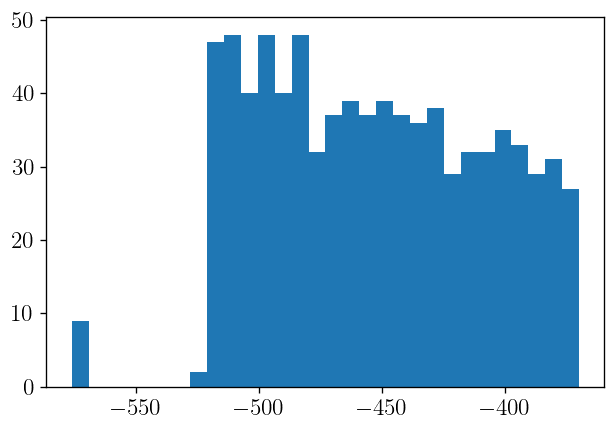

In [19]:
l = get_h5_file_creation_times(f"{cache_dir}/*.h5") - time.time()
plt.hist(l, bins=30);

In [ ]:
lightcone = p21c.run_lightcone(
    redshift = brightness_temp.redshift,
    user_params = brightness_temp.user_params,
    cosmo_params = brightness_temp.cosmo_params,
    astro_params = brightness_temp.astro_params,
    flag_options = brightness_temp.flag_options,
    lightcone_quantities = lightcone_quantities,
)

lightcone._write(fname='lc', direc='tmp', clobber=True)

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [4]:
rec.keys()

dict_keys(['z', 'T_s', 'T_b', 'T_k', 'x_e', '1-x_H', 'phot_N', 'dE_inj_per_B', 'dE_inj_per_Bavg_unclustered', 'dep_ion', 'dep_exc', 'dep_heat', 'x_e_slice', 'x_H_slice', 'T_k_slice', 'brightness_temp'])